In [3]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /opt/anaconda3/envs/PythonML/lib/python3.6/site-packages (0.0)


In [4]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# EDA

In [6]:
# Displaying df with all columns available 
pd.set_option("display.max_columns",None)

In [7]:
# Reading data into dataframe 
df = pd.read_csv("exoplanet_data.csv")
df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [8]:
# Checking for null values
for column in df.columns:
    print(f'{column} : {df.loc[:,column].isnull().sum()}')

koi_disposition : 0
koi_fpflag_nt : 0
koi_fpflag_ss : 0
koi_fpflag_co : 0
koi_fpflag_ec : 0
koi_period : 0
koi_period_err1 : 0
koi_period_err2 : 0
koi_time0bk : 0
koi_time0bk_err1 : 0
koi_time0bk_err2 : 0
koi_impact : 0
koi_impact_err1 : 0
koi_impact_err2 : 0
koi_duration : 0
koi_duration_err1 : 0
koi_duration_err2 : 0
koi_depth : 0
koi_depth_err1 : 0
koi_depth_err2 : 0
koi_prad : 0
koi_prad_err1 : 0
koi_prad_err2 : 0
koi_teq : 0
koi_insol : 0
koi_insol_err1 : 0
koi_insol_err2 : 0
koi_model_snr : 0
koi_tce_plnt_num : 0
koi_steff : 0
koi_steff_err1 : 0
koi_steff_err2 : 0
koi_slogg : 0
koi_slogg_err1 : 0
koi_slogg_err2 : 0
koi_srad : 0
koi_srad_err1 : 0
koi_srad_err2 : 0
ra : 0
dec : 0
koi_kepmag : 0


In [9]:
# Descriptive stats
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,0.730631,1.945368,-0.337243,5.549368,0.320715,-0.320715,2.391190e+04,130.789186,-130.789186,121.194193,19.483454,-40.352509,1095.152768,8.263769e+03,3.599918e+03,-4.302621e+03,276.038764,1.233729,5700.682449,143.898155,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,3.346956,9.401850,1.349036,6.425205,0.665352,0.665352,8.241240e+04,4689.233030,4689.233030,3519.737626,436.752064,1366.939375,856.234809,1.775255e+05,5.607270e+04,9.924848e+04,824.788481,0.650089,802.060405,46.566511,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.167000,0.000000,-20.200000,7.500000e+00,0.000000,-388600.000000,0.140000,0.000000,-77180.000000,92.000000,2.000000e-02,0.000000e+00,-5.600031e+06,1.600000,1.000000,2661.000000,0.000000,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,0.198000,0.039900,-0.446000,2.446000,0.048900,-0.334000,1.604000e+02,9.400000,-48.000000,1.400000,0.240000,-2.080000,554.000000,2.227000e+01,1.139000e+01,-3.068950e+02,12.400000,1.000000,5297.000000,105.000000,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,0.539000,0.189800,-0.204000,3.793000,0.137000,-0.137000,4.245000e+02,20.200000,-20.200000,2.420000,0.520000,-0.310000,888.000000,1.466700e+02,8.090000e+01,-4.443000e+01,23.700000,1.000000,5757.000000,156.000000,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,0.891000,0.379000,-0.044000,6.197500,0.334000,-0.048900,1.533250e+03,48.000000,-9.400000,15.965000,2.650000,-0.140000,1397.500000,9.006700e+02,5.529550e+02,-6.400000e+00,82.250000,1.000000,6110.000000,174.000000,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,14667.000000,1.094755e+07,3.617133e+06,0.000000e+00,9054.700000,8.000000,15896.000000,676.000000,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


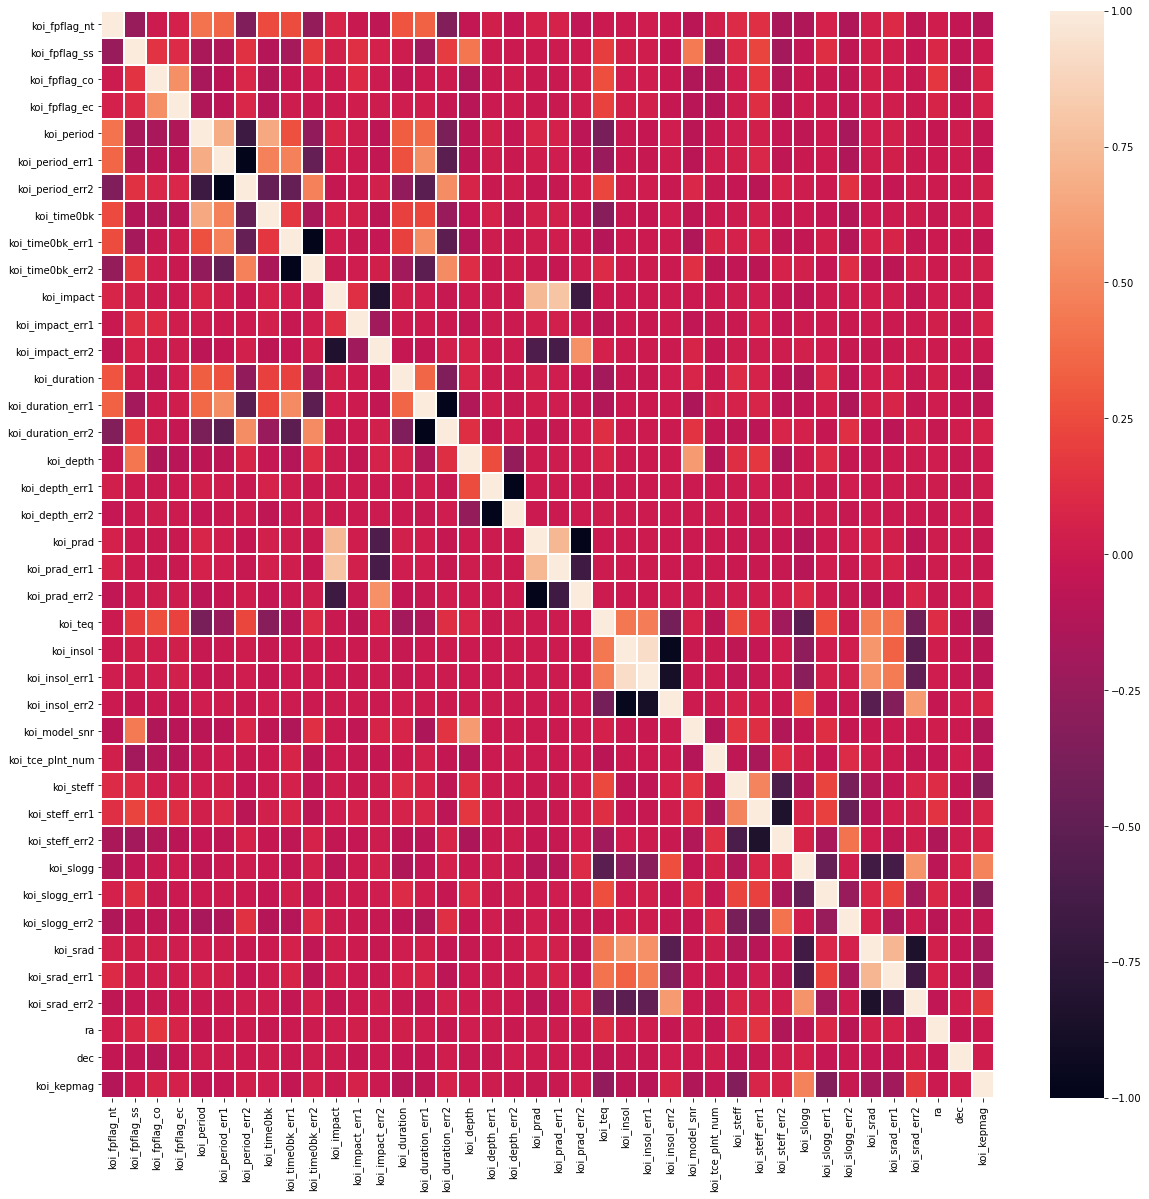

In [10]:
# Correlation matrix of inputs
corrMatrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrMatrix,linewidths=1)
plt.show()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

## Create a Train Test Split

Use `koi_disposition` for the y values

In [28]:
# Dividing data into inputs and targets
targets = df.iloc[:,0]
inputs = df.iloc[:,1:]

# Shuffling data
shuffled_indicies = np.arange(inputs.shape[0])
np.random.shuffle(shuffled_indicies)

shuffled_inputs = inputs.loc[shuffled_indicies,:]
shuffled_targets = targets[shuffled_indicies]

# Splitting training and test datasets

X_train, X_test, y_train, y_test = train_test_split(shuffled_inputs, shuffled_targets, random_state=1)

In [49]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,5.470000e-05,-5.470000e-05,139.064020,0.004110,-0.004110,1.0170,0.0470,-0.7860,1.8720,0.1430,-0.1430,102.9,10.4,-10.4,3.89,0.65,-0.34,899,154.84,72.78,-37.23,11.7,2,6047,120,-133,4.387,0.066,-0.123,1.092,0.181,-0.097,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,1.365000e-04,-1.365000e-04,140.207320,0.004460,-0.004460,0.7090,0.0230,-0.5160,3.3900,0.1530,-0.1530,593.3,38.0,-38.0,2.10,0.14,-0.20,491,13.70,3.92,-3.75,18.0,1,4852,144,-144,4.519,0.078,-0.052,0.804,0.056,-0.076,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,1.230000e-07,-1.230000e-07,131.792007,0.000096,-0.000096,0.2620,0.2740,-0.1130,1.5795,0.0152,-0.0152,47337.0,120.0,-120.0,14.59,1.15,-1.28,1276,623.51,184.18,-164.28,476.0,1,4664,126,-140,4.594,0.054,-0.027,0.683,0.054,-0.060,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,1.461000e-03,-1.461000e-03,187.569860,0.005290,-0.005290,0.0010,0.4170,-0.0010,10.3280,0.1650,-0.1650,584.8,19.2,-19.2,2.28,0.32,-0.20,300,1.92,0.77,-0.44,34.7,1,5646,101,-112,4.447,0.072,-0.108,0.954,0.135,-0.083,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,3.181000e-03,-3.181000e-03,175.715600,0.028600,-0.028600,0.2136,0.2282,-0.2135,10.2940,0.9390,-0.9390,193.6,23.9,-23.9,2.27,1.27,-0.54,568,24.57,41.53,-12.19,8.7,2,6705,164,-233,4.145,0.164,-0.164,1.608,0.905,-0.383,294.93198,39.812420,12.964


In [41]:
# Scale input data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [42]:
# Save data to npz files
np.savez("../Data/Kepler_data_train",inputs = X_train_scaled, targets = y_train)
np.savez("../Data/Kepler_data_test",inputs = X_test_scaled, targets = y_test) 